# TOPIC MODELING by Latent Dirichlet Allocation (LDiA)

# At the document level, the most useful ways to understand text by its topics. The statistical process of learning and extracting these topics from huge amount of documents is called topic modeling.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import nltk

import textwrap

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
stops = set(stopwords.words('english'))

In [4]:
stops = stops.union({'said','would','could','told','also','one','two','mr','new','year'})

In [5]:
type(stops)

set

In [6]:
type(stops)

set

In [7]:
stops = list(stops)

In [8]:
stops[:10]

["it's",
 'because',
 'they',
 'do',
 'won',
 'he',
 'had',
 "they've",
 'mightn',
 "weren't"]

In [9]:
df = pd.read_csv('bbc_text_cls_working.csv')

In [10]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [11]:
df["labels"].value_counts()

,count
labels,
sport,511
business,510
politics,417
tech,401
entertainment,386


In [12]:
df

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business
...,...,...
2220,BT program to beat dialler scams\n\nBT is intr...,tech
2221,Spam e-mails tempt net shoppers\n\nComputer us...,tech
2222,Be careful how you code\n\nA new European dire...,tech
2223,US cyber security chief resigns\n\nThe man mak...,tech


In [13]:
vectorizer = CountVectorizer(stop_words = stops)

In [14]:
vectorizer

CountVectorizer(stop_words=["it's", 'because', 'they', 'do', 'won', 'he', 'had',
                            "they've", 'mightn', "weren't", 'can', 'weren',
                            "shan't", 'ourselves', "you'll", "you're", 'why',
                            'said', 'too', 'few', 'who', 'between', "she'd",
                            'doesn', 'should', 'as', 'couldn', 'any', 'is',
                            'this', ...])

In [15]:
X = vectorizer.fit_transform(df['text'])

In [16]:
X

<2225x29270 sparse matrix of type '<class 'numpy.int64'>'
	with 340920 stored elements in Compressed Sparse Row format>

In [17]:
lda = LatentDirichletAllocation(n_components=10,random_state=12345)

In [18]:
lda.fit(X)

LatentDirichletAllocation(random_state=12345)

In [19]:
def plot_top_words(model, feature_names, n_top_words=15):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}', fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle('LDiA', fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [20]:
feature_names = vectorizer.get_feature_names_out()

In [21]:
feature_names

array(['00', '000', '0001', ..., 'zutons', 'zvonareva', 'zvyagintsev'],
      dtype=object)

In [22]:
len(feature_names)

29270

In [23]:
feature_names[7000:7090]

array(['cos', 'cosafa', 'cosby', 'cosgrave', 'cosh', 'cosiness', 'cosla',
       'coslett', 'cosmetic', 'cosmetics', 'cosmic', 'cosmopolitan',
       'cossins', 'cost', 'costa', 'costacurta', 'costantini', 'costas',
       'costco', 'costed', 'costello', 'costin', 'costing', 'costings',
       'costliest', 'costly', 'costner', 'costs', 'costume', 'costumes',
       'cote', 'cotis', 'cotonsport', 'cottage', 'cottages', 'cottenham',
       'cotterill', 'cotterills', 'cotton', 'couch', 'couched',
       'coudenberg', 'cough', 'council', 'councillor', 'councillors',
       'councils', 'counsel', 'counselling', 'counsellor', 'count',
       'countdown', 'counted', 'counter', 'counteract',
       'counterbalancing', 'countered', 'counterfeit', 'counterfeiters',
       'counterfeiting', 'countering', 'counterpart', 'counterparts',
       'counterproductive', 'counterterrorism', 'counties', 'counting',
       'countless', 'countries', 'country', 'countryfile', 'countrymen',
       'countryside

# Remember:

# Every Topic is a distribution of words

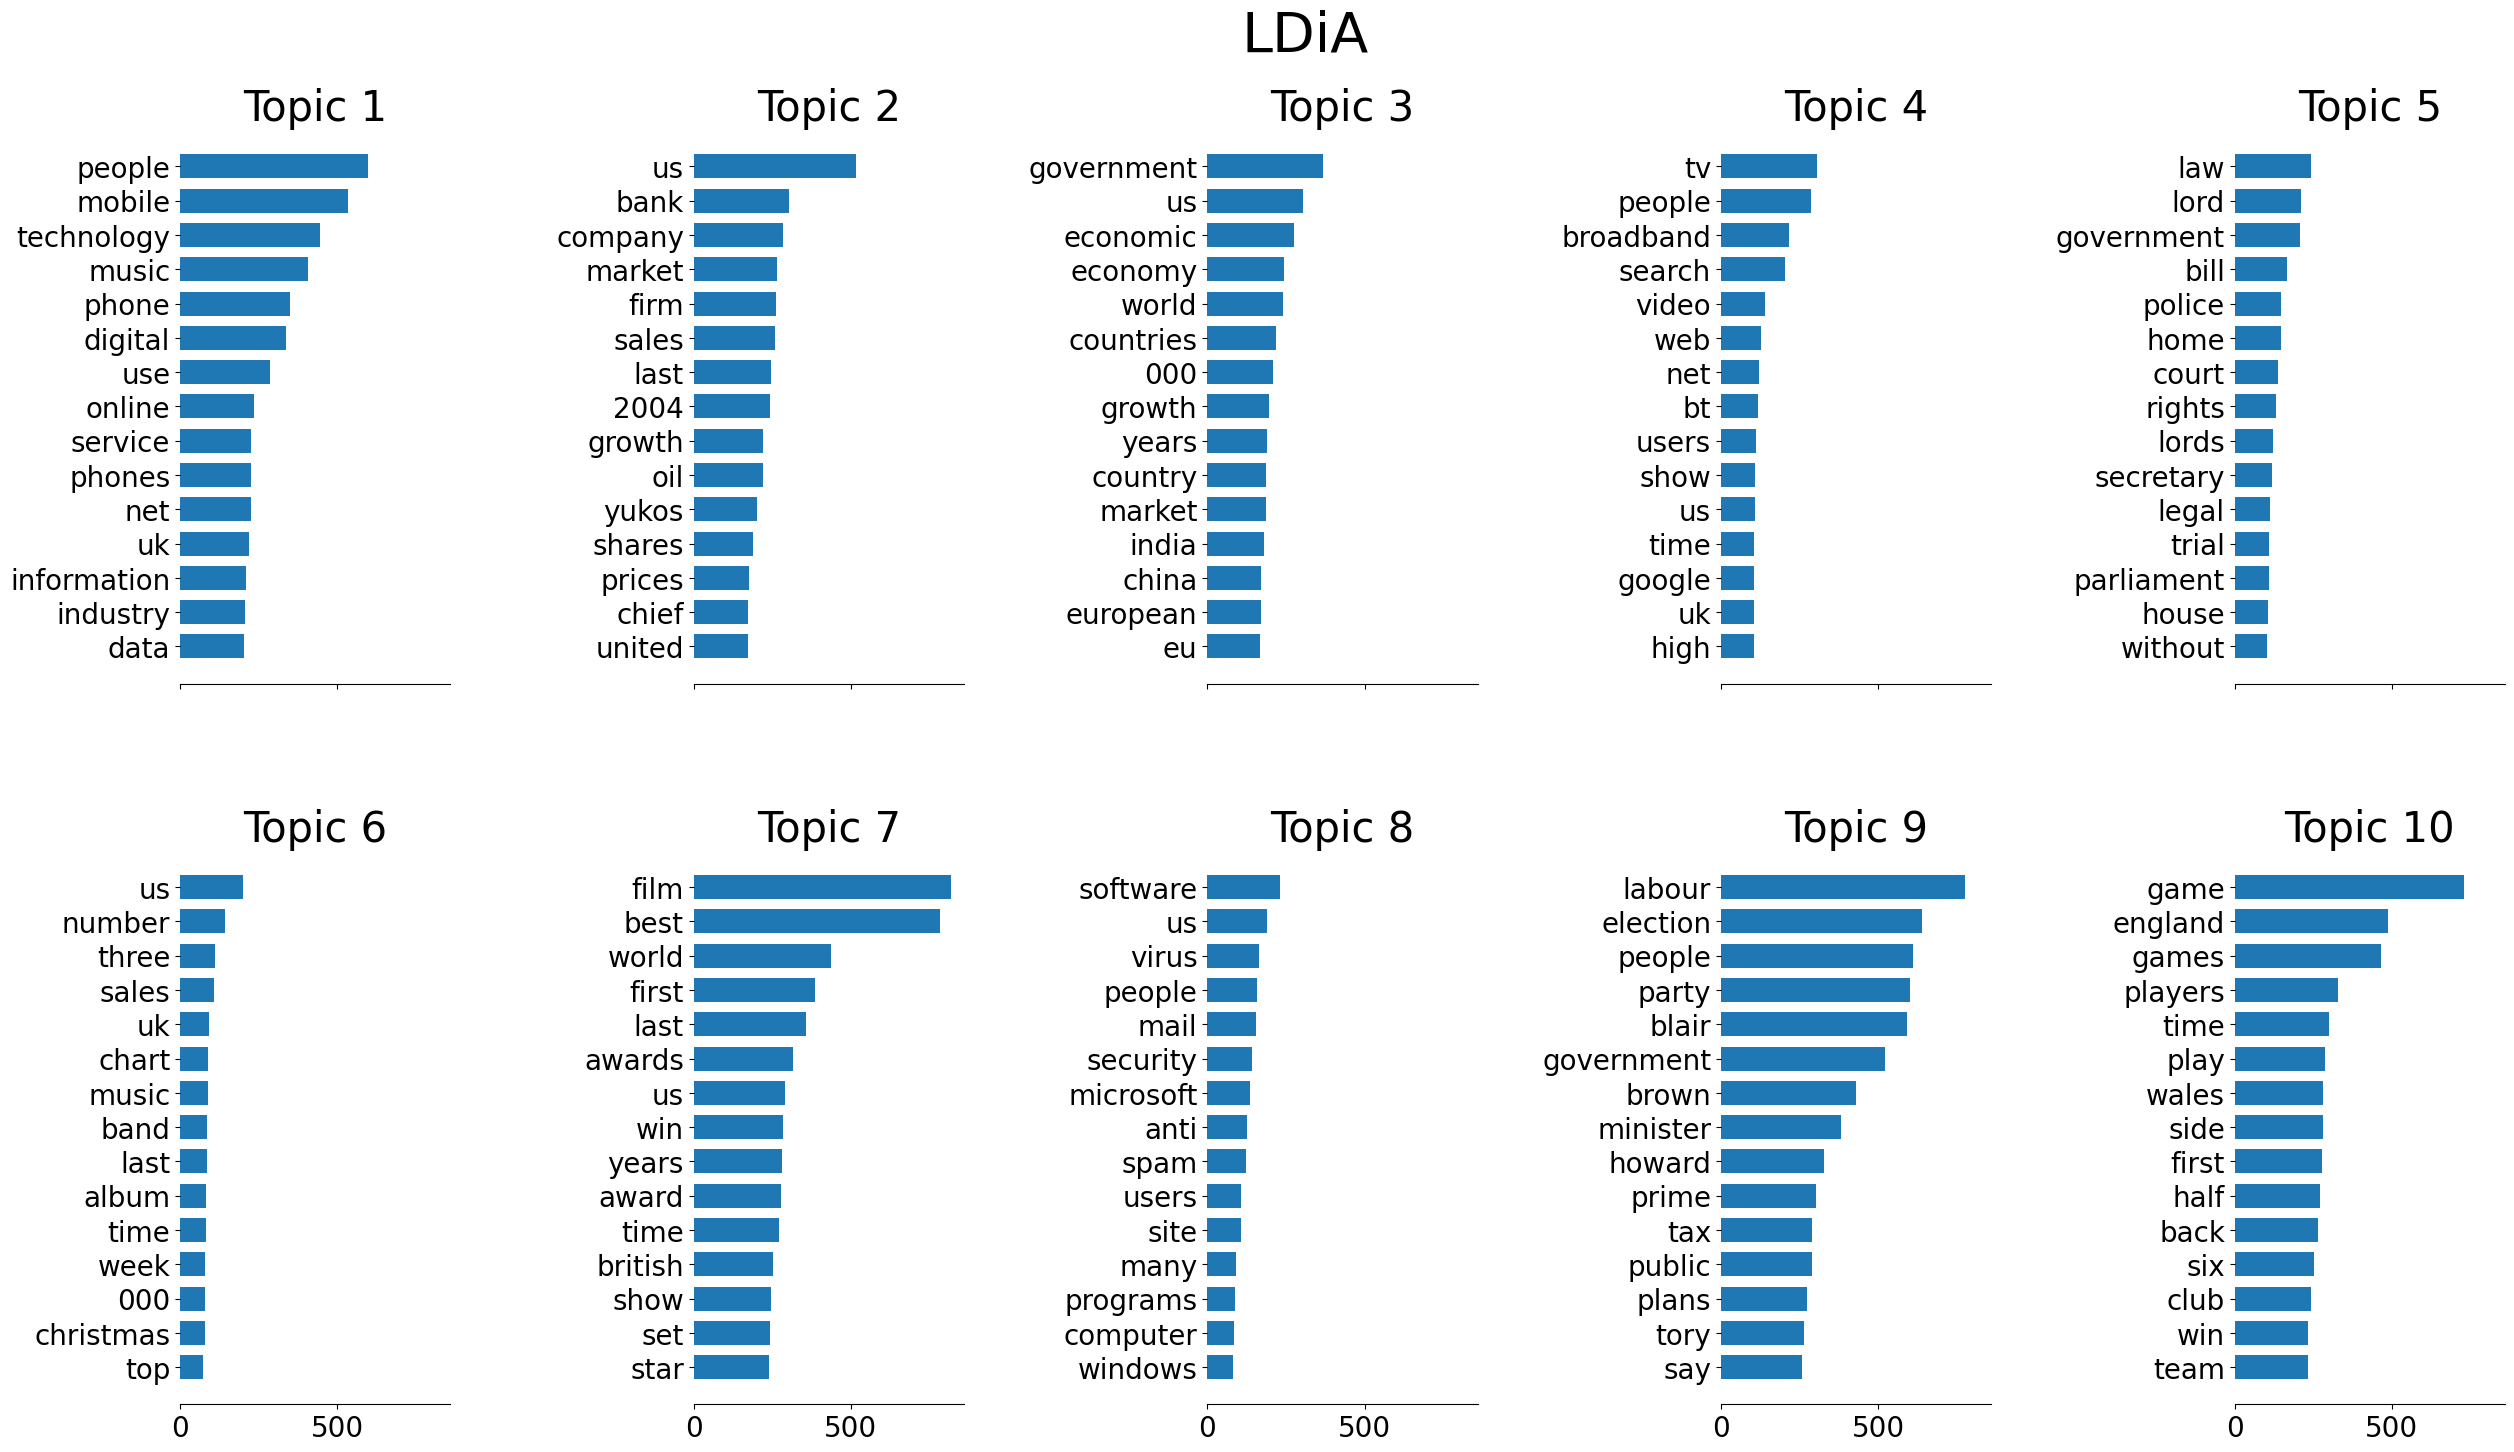

In [24]:
plot_top_words(lda,feature_names)

In [25]:
Z = lda.transform(X)

# Pick a random document
# Check which "topics" are associated with it
# Are they realted to the true label?

Document Number: 1653




Charvis set to lose fitness bid

Flanker Colin Charvis is unlikely to play any part in Wales' final two games of the Six Nations.

Charvis has missed all three of Wales' victories with an ankle injury and his recovery has been slower than expected. "He will not figure in the Scotland game and is now thought unlikely to be ready for the final game," said Wales physio Mark Davies. Sonny Parker is continuing to struggle with a neck injury, but Hal Luscombe should be fit for the Murrayfield trip. Centre Parker has only a "slim chance" of being involved against the Scots on 13 March, so Luscombe's return to fitness after missing the France match with hamstring trouble is a timely boost.

Said Wales assistant coach Scott Johnson: "We're positive about Hal and hope he'll be raring to go. "He comes back into the mix again, adds to the depth and gives us other options. " Replacement hooker Robin McBryde remains a doubt after picking up knee ligament damage in Paris las

<BarContainer object of 10 artists>

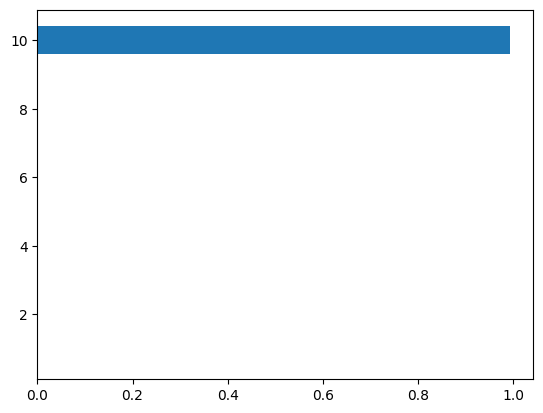

In [26]:
np.random.seed(0)
i = np.random.choice(len(df))

print(f"Document Number: {i}")

print("\n\n\n")

print(df.iloc[i]["text"])

z = Z[i]
topics = np.arange(10) + 1

fig, ax = plt.subplots()
ax.barh(topics,z)

# ax.set_yticks(topics)
# ax.set_title('True label: %s' % df.iloc[i]['labels'])

# Remember

# Every Document is the distribution of Topics

In [27]:
i

1653

In [28]:
z

array([8.33430458e-04, 8.33590488e-04, 8.33517715e-04, 8.33434804e-04,
       8.33433754e-04, 8.33439333e-04, 8.33452430e-04, 8.33403929e-04,
       8.33444336e-04, 9.92498853e-01])

In [29]:
np.argmax(z) + 1

10

In [30]:
df.iloc[i]

,1653
text,Charvis set to lose fitness bid\n\nFlanker Col...
labels,sport


In [31]:
df.iloc[i]["text"]

'Charvis set to lose fitness bid\n\nFlanker Colin Charvis is unlikely to play any part in Wales\' final two games of the Six Nations.\n\nCharvis has missed all three of Wales\' victories with an ankle injury and his recovery has been slower than expected. "He will not figure in the Scotland game and is now thought unlikely to be ready for the final game," said Wales physio Mark Davies. Sonny Parker is continuing to struggle with a neck injury, but Hal Luscombe should be fit for the Murrayfield trip. Centre Parker has only a "slim chance" of being involved against the Scots on 13 March, so Luscombe\'s return to fitness after missing the France match with hamstring trouble is a timely boost.\n\nSaid Wales assistant coach Scott Johnson: "We\'re positive about Hal and hope he\'ll be raring to go. "He comes back into the mix again, adds to the depth and gives us other options. " Replacement hooker Robin McBryde remains a doubt after picking up knee ligament damage in Paris last Saturday. "W

In [32]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [33]:
i

1653

In [34]:
df.iloc[i]['labels']

'sport'

In [35]:
Z[i]

array([8.33430458e-04, 8.33590488e-04, 8.33517715e-04, 8.33434804e-04,
       8.33433754e-04, 8.33439333e-04, 8.33452430e-04, 8.33403929e-04,
       8.33444336e-04, 9.92498853e-01])

# Another Example

Document Number: 836




Kidman wins photographer battle

Actress Nicole Kidman has won a restraining order against two paparazzi photographers who she claims left her fearful of leaving her Sydney mansion.

The Oscar-winning star took action against Jamie Fawcett and Ben McDonald after a bugging device was found outside her home earlier this week. Lawyers for the pair denied allegations they had planted the device. The Australian actress is currently in Sydney to film her latest movie, Eucalyptus, with Russell Crowe. Kidman was prompted to take action following a reported high-speed car chase with members of the paparazzi in Sydney last weekend.

According to local newspaper the Daily Telegraph, the incident involved paparazzi driving through red lights and on the wrong side of the road in pursuit of Kidman's vehicle. Lawyers for Mr Fawcett and Mr McDonald denied that the pair were involved in the chase. Kidman sought the "apprehended violence" orders - normally used in Australia in c

Text(0.5, 1.0, 'True label: entertainment')

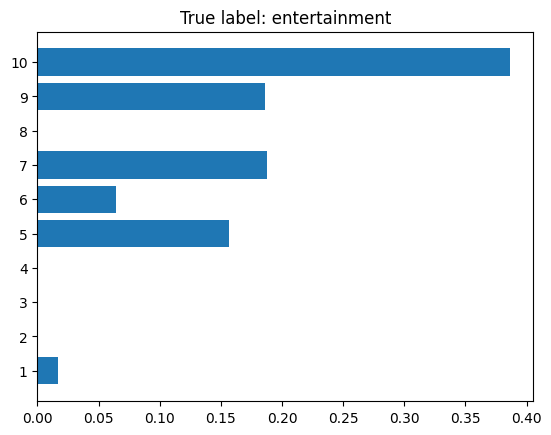

In [36]:
print(f"Document Number: {836}")

print("\n\n\n")

print(df.iloc[836]["text"])

z = Z[836]
topics = np.arange(10) + 1

fig, ax = plt.subplots()
ax.barh(topics,z)

ax.set_yticks(topics)
ax.set_title('True label: %s' % df.iloc[836]['labels'])

# Document no. 836 is all about Topic no. 10 Topic no 9 Topic no 7, Topic no 6, Topic no 5 and Topic no 1

In [37]:
z

array([0.01685374, 0.00060259, 0.00060255, 0.00060255, 0.15672624,
       0.06419617, 0.18752295, 0.00060258, 0.18612764, 0.38616299])

# Another example

Document Number: 630




Belle named 'best Scottish band'

Belle & Sebastian have been named the best Scottish band of all time after a three month-long public poll.

The group beat Travis and Idlewild into second and third place respectively. Franz Ferdinand, who recently picked up five Brit Award nominations, ended up in 15th place, while the Eurythmics wound up at a lowly 38. Other Scottish acts, such as the Mull Historical Society who also featured in the top 50, performed at a party in Glasgow where the result was announced. Scottish-based band Snow Patrol, who finished 14th in the vote and have been nominated for a pair of Brit Awards, were among the performers who covered well-known Scottish pop songs at the party on Wednesday night.

Indie stalwarts Belle & Sebastian have enjoyed a chart career stretching back to 1997. They were the surprise winners of the Brit Award for best breakthrough act two years later. Scottish bands from earlier musical eras also made it into the final 

Text(0.5, 1.0, 'True label: entertainment')

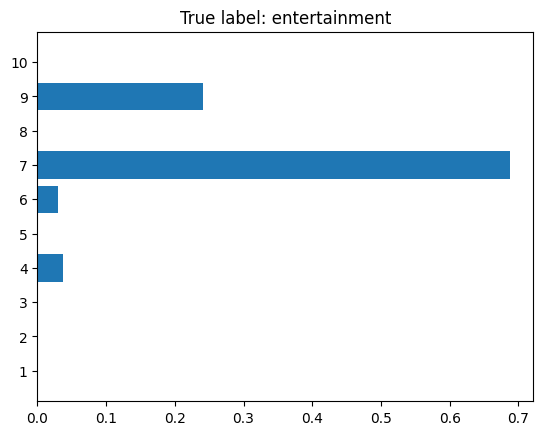

In [38]:
print(f"Document Number: {630}")

print("\n\n\n")

print(df.iloc[630]["text"])

z = Z[630]
topics = np.arange(10) + 1

fig, ax = plt.subplots()
ax.barh(topics,z)

ax.set_yticks(topics)
ax.set_title('True label: %s' % df.iloc[630]['labels'])

# Another Example

Document Number: 235




Card fraudsters 'targeting web'

New safeguards on credit and debit card payments in shops has led fraudsters to focus on internet and phone payments, an anti-fraud agency has said.

Anti-fraud consultancy Retail Decisions says 'card-not-present' fraud, where goods are paid for online or by phone, has risen since the start of 2005. The introduction of 'chip and pin' cards has tightened security for transactions on the High Street. But the clampdown has caused fraudsters to change tack, Retail Decisions said.

The introduction of chip and pin cards aimed to cut down on credit card fraud in stores by asking shoppers to verify their identity with a confidential personal pin number, instead of a signature. Retail Decisions chief executive Carl Clump told the BBC that there was "no doubt" that chip and pin would "reduce card fraud in the card-present environment". "However, it is important to monitor what happens in the card-not-present environment as fraudsters wil

Text(0.5, 1.0, 'True label: business')

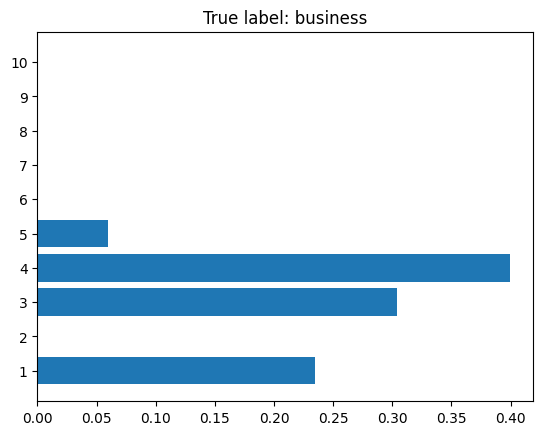

In [39]:
print(f"Document Number: {235}")

print("\n\n\n")

print(df.iloc[235]["text"])

z = Z[235]
topics = np.arange(10) + 1

fig, ax = plt.subplots()
ax.barh(topics,z)

ax.set_yticks(topics)
ax.set_title('True label: %s' % df.iloc[235]['labels'])

In [40]:
z

array([0.23434233, 0.00044067, 0.30369806, 0.3992126 , 0.06010319,
       0.00044062, 0.00044064, 0.00044063, 0.00044063, 0.00044063])

# Remember

# Every Document is the distribution of Topics

In [41]:
def wrap(x):
    return textwrap.fill(x,replace_whitespace=False,fix_sentence_endings=True)

print(wrap(df.iloc[i]['text']))

Charvis set to lose fitness bid

Flanker Colin Charvis is unlikely to
play any part in Wales' final two games of the Six Nations.

Charvis
has missed all three of Wales' victories with an ankle injury and his
recovery has been slower than expected.  "He will not figure in the
Scotland game and is now thought unlikely to be ready for the final
game," said Wales physio Mark Davies.  Sonny Parker is continuing to
struggle with a neck injury, but Hal Luscombe should be fit for the
Murrayfield trip.  Centre Parker has only a "slim chance" of being
involved against the Scots on 13 March, so Luscombe's return to
fitness after missing the France match with hamstring trouble is a
timely boost.

Said Wales assistant coach Scott Johnson: "We're
positive about Hal and hope he'll be raring to go.  "He comes back
into the mix again, adds to the depth and gives us other options.  "
Replacement hooker Robin McBryde remains a doubt after picking up knee
ligament damage in Paris last Saturday.  "We're g

Text(0.5, 1.0, 'True label: entertainment')

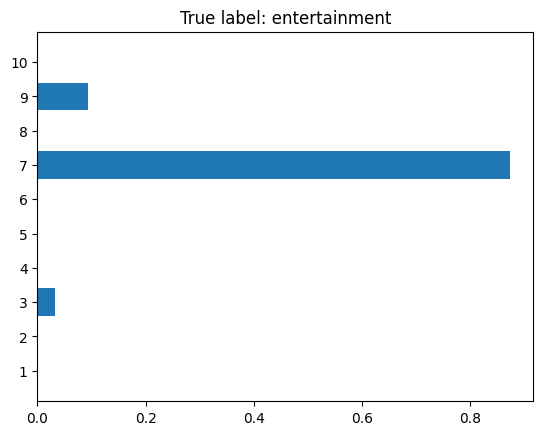

In [42]:
i = np.random.choice(len(df))

z = Z[i]

fig, ax = plt.subplots()
ax.barh(topics,z)

ax.set_yticks(topics)
ax.set_title('True label: %s' % df.iloc[i]['labels'])

In [43]:
i

835

# Remember

# Every Document is the distribution of Topics

In [44]:
print(wrap(df.iloc[i]['text']))

Oscars steer clear of controversy

The Oscars nominations list has
left out some of the most controversial films of the past year in
favour of safer, less contentious cinema.

If best film nominees were
drawn on the basis of column inches, two of the front-runners would
have had to be Michael Moore's Bush-baiting documentary Fahrenheit
9/11 and Mel Gibson's The Passion of the Christ.  Both films polarised
opinion but had critics talking, and the public turning up to see them
- Fahrenheit 9/11 breaking US box office records for a documentary,
and The Passion of the Christ making more than US$370m (£196m) in the
US alone.  But this year's Academy Awards have shied away from the big
name controversies, with The Passion of the Christ - a film accused of
being anti-Semitic - receiving nominations only in the 'minor'
categories of cinematography, makeup and musical score.

Fahrenheit
9/11 has also been overlooked, despite winning the Palme d'Or at the
Cannes International Film Festival in 20

Text(0.5, 1.0, 'True label: entertainment')

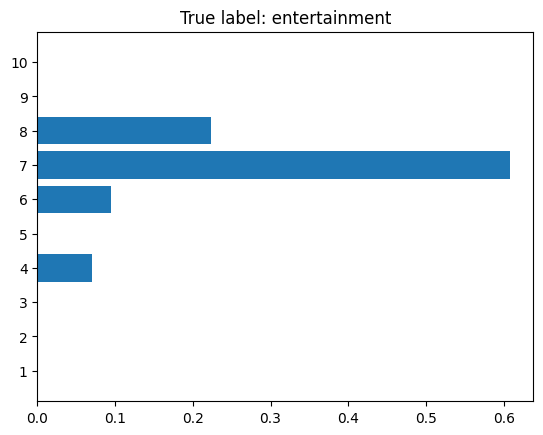

In [45]:
i = np.random.choice(len(df))

z = Z[i]

fig, ax = plt.subplots()
ax.barh(topics,z)

ax.set_yticks(topics)
ax.set_title('True label: %s' % df.iloc[i]['labels'])